In [47]:
#EDA
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings

warnings.filterwarnings("ignore")

| Column Name | Description |
|-------------|-------------|
| year | year |
| track_name | track name |
| track_popularity | track popularity from 0 to 100 |
| album | album the track appears on |
| artist_name | artist name |
| artist_genres | list of the Genres the artist is associated with |
| artist_popularity | artist popularity from 0 to 100, being the maximum |
| danceability | a value of 0.0 is least danceable and 1.0 is most danceable |
| energy | a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity, being 1.0 the maximum |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C,  1 = C♯/D♭,  2 = D  and so on |
| loudness | The overall loudness of a track in decibels (dB) |
| mode | Modality (major or minor) of a track. Major = 1 and minor = 0 |
| speechiness | Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. |
| acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic |
| instrumentalness | Predicts whether a track contains no vocals |
| liveness | Detects the presence of an audience in the recording |
| valence | a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track |
| tempo | The overall estimated tempo of a track in beats per minute (BPM) |
| duration_ms | The duration of the track in milliseconds |
| track_age_2024 | Age of the track from 2024 |
| dominant genre | Global Genre (manual classification) |

In [48]:
data_clean = pd.read_excel("/Users/lucazosso/Desktop/IE_Course/Term_2/Machine Learning II/Group Assignement/data/clean_data1.xlsx", index_col='song_id')
data_clean.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_age_2024,dominant_genre
song_id,,,,,,,,,,,,,,,,,,,,,
0,2000,Yellow,91,Parachutes,Coldplay,"['permanent wave', 'pop']",86,0.429,0.661,B,...,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773,24,rock
1,2000,All The Small Things,84,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,0.434,0.897,C,...,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067,24,rock
2,2000,Breathe,69,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",61,0.529,0.496,G,...,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547,24,country
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,0.556,0.864,D#,...,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880,24,rock
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",65,0.610,0.926,G#,...,0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400,24,pop


In [49]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2299.0,2011.003045,6.634528,2000.000000,2005.00000,2011.0000,2017.000000,2022.000
track_popularity,2299.0,70.944759,12.294047,0.000000,66.00000,72.0000,79.000000,100.000
artist_popularity,2299.0,72.873423,12.180506,29.000000,65.00000,74.0000,82.000000,100.000
danceability,2299.0,0.660116,0.141137,0.162000,0.57200,0.6710,0.759500,0.975
energy,2299.0,0.693047,0.164838,0.051900,0.58600,0.7120,0.820000,0.999
loudness,2299.0,73.006960,15.643937,-56.000000,63.00000,74.0000,83.000000,132.000
mode,2299.0,0.598521,0.490304,0.000000,0.00000,1.0000,1.000000,1.000
speechiness,2299.0,0.097795,0.092445,0.022500,0.03800,0.0568,0.115500,0.576
acousticness,2299.0,0.157689,0.203844,0.000013,0.01650,0.0689,0.223000,0.978
instrumentalness,2299.0,0.013766,0.083990,0.000000,0.00000,0.0000,0.000054,0.985


In [50]:
data_clean.isnull().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
track_age_2024       0
dominant_genre       0
dtype: int64

## Exploratory Data Analysis
### Popularity investigation

Top 100 Popular Songs

In [51]:
Top_100 = data_clean[['dominant_genre','artist_name','track_name','track_popularity','artist_popularity']].query('track_popularity > 90').sort_values('track_popularity', ascending=False)
Top_100.head(100)

,dominant_genre,artist_name,track_name,track_popularity,artist_popularity
song_id,,,,,
1903,pop,Taylor Swift,Cruel Summer,100,100
2012,pop,Taylor Swift,august,93,100
2202,pop,Taylor Swift,Anti-Hero,93,100
2286,pop,David Guetta,I'm Good (Blue),93,86
1600,rnb_soul,The Weeknd,Starboy,92,94
2162,rnb_soul,The Weeknd,Blinding Lights,92,94
2227,rock,OneRepublic,I Ain't Worried,92,81
2289,pop,Rema,Calm Down (with Selena Gomez),92,77
0,rock,Coldplay,Yellow,91,86


Top 100 least popular song

In [52]:
Bottom_100 = data_clean[['dominant_genre','artist_name','track_name','track_popularity','artist_popularity']].sort_values('track_popularity', ascending=True)
Bottom_100.head(100)

,dominant_genre,artist_name,track_name,track_popularity,artist_popularity
song_id,,,,,
2070,hip_hop_rap,Machine Gun Kelly,my ex's best friend (with blackbear),0,75
2170,hip_hop_rap,Pop Smoke,What You Know Bout Love,0,79
399,hip_hop_rap,Fatman Scoop,Be Faithful,0,57
2002,pop,Ariana Grande,positions,0,87
2145,pop,Lorde,Solar Power,0,74
...,...,...,...,...,...
2001,pop,Taylor Swift,cardigan,53,100
295,other,City High,Caramel,53,43
294,pop,*NSYNC,Girlfriend,53,65


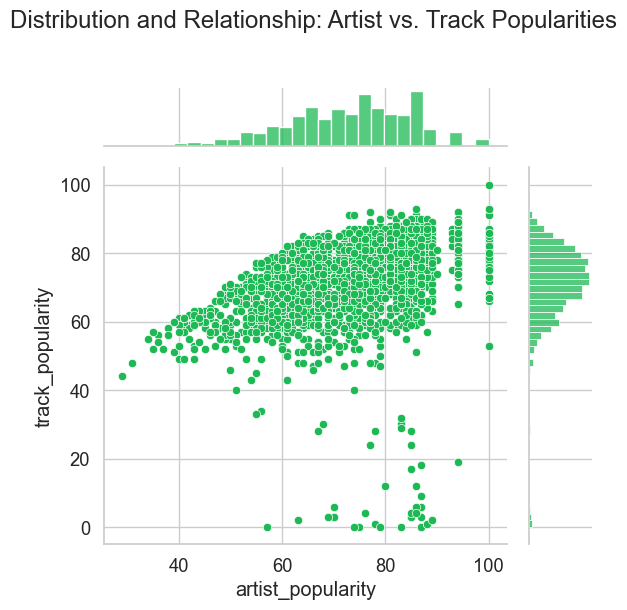

In [53]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a joint plot
sns.jointplot(x='artist_popularity', y='track_popularity', data=data_clean, kind='scatter', color='#1db954')

# Set labels and title
plt.xlabel('artist_popularity')
plt.ylabel('track_popularity')
plt.suptitle('Distribution and Relationship: Artist vs. Track Popularities', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

#### Distributions of Tracks by genre & Track popularity

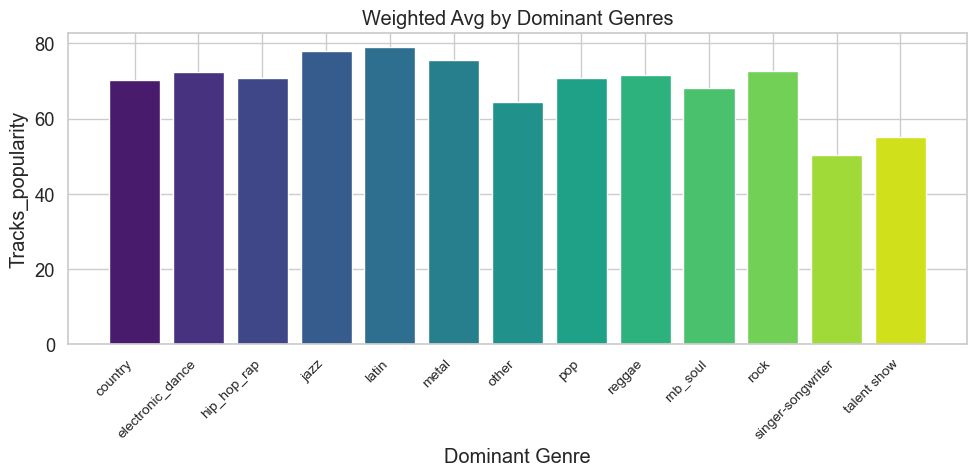

In [54]:
# Calculate genre counts
# Assuming df is your DataFrame
#data_clean.reset_index(inplace=True)
# // Count //
#genre_counts = data_clean.groupby('dominant_genre')['song_id'].count()

# // AVG //
genre_counts = data_clean.groupby('dominant_genre')['track_popularity'].mean()

## // Weighted //


# Set up the bar plot
plt.figure(figsize=(10, 5))
viridis_palette = sns.color_palette("viridis", n_colors=len(genre_counts))

# Plot the bar plot with 'viridis' color palette
bar_plot = plt.bar(genre_counts.index, genre_counts, color=viridis_palette)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and font size

# Add a title and axis labels
plt.title('Weighted Avg by Dominant Genres')
plt.xlabel('Dominant Genre')
plt.ylabel('Tracks_popularity')

# Prevent overlapping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

plotting energy variation accross genre

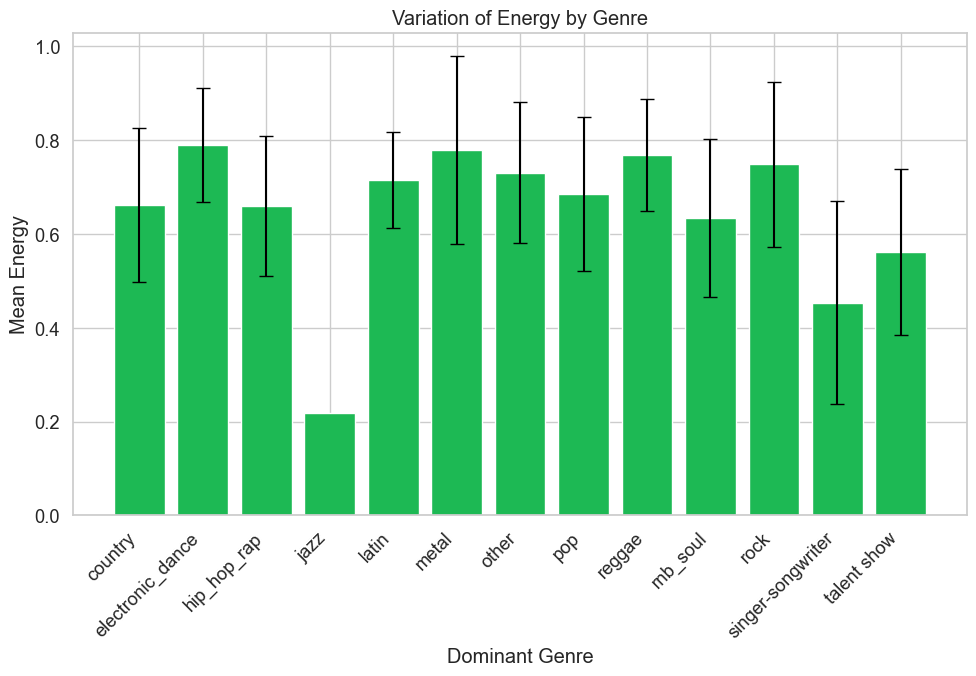

In [55]:
plt.figure(figsize=(10, 7))
sns.set_context("notebook", font_scale=1.2)

# Calculate mean energy and standard deviation by genre
energy_stats = data_clean.groupby('dominant_genre')['energy'].agg(['mean', 'std']).reset_index()

# Create the bar plot with error bars
plt.bar(energy_stats['dominant_genre'], energy_stats['mean'], color='#1db954', yerr=energy_stats['std'], capsize=5)

# Add labels and title
plt.xlabel('Dominant Genre')
plt.ylabel('Mean Energy')
plt.title('Variation of Energy by Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Exploring Spread on Audio Features + other numeric variables

In [58]:
data_clean.dtypes


year                   int64
track_name            object
track_popularity       int64
album                 object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                   object
loudness               int64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
track_age_2024         int64
dominant_genre        object
dtype: object

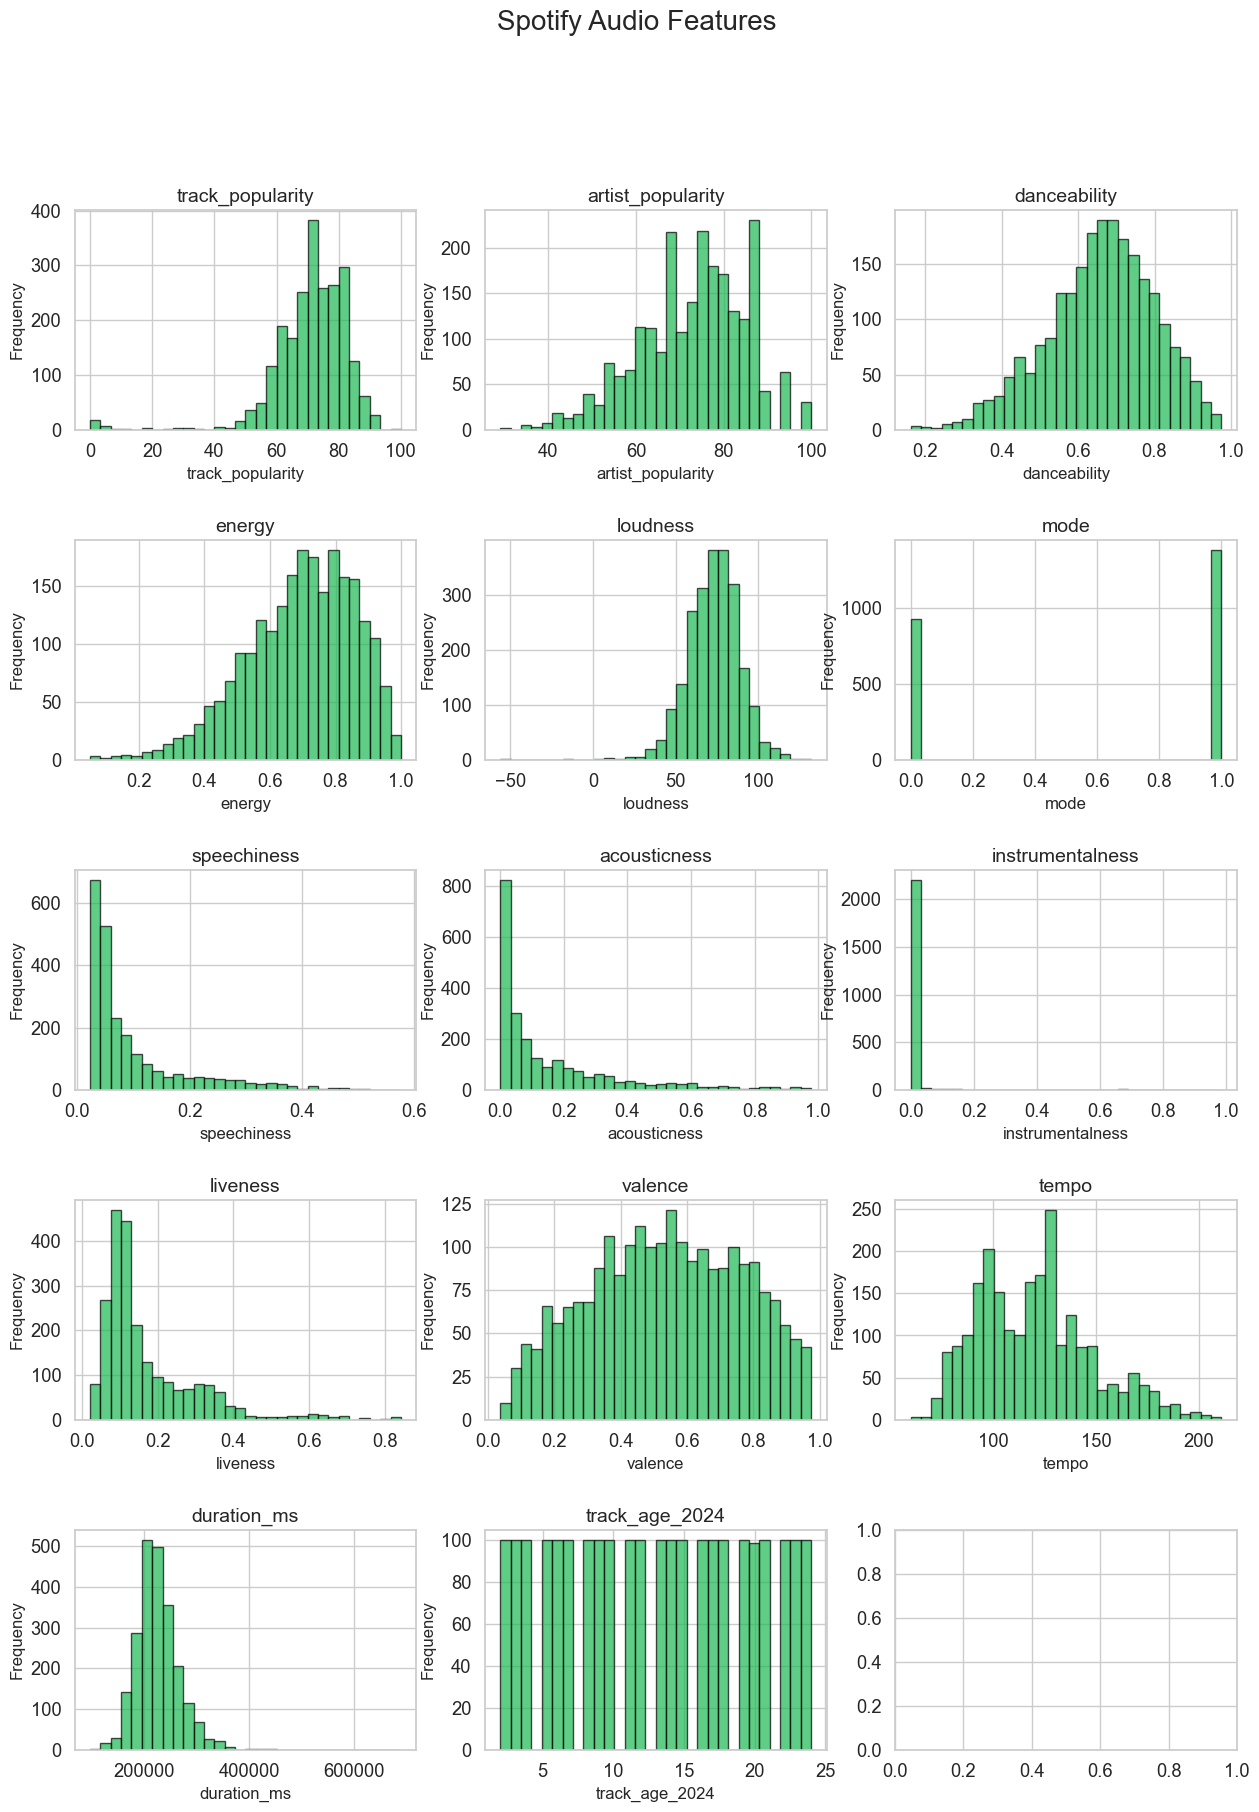

In [61]:
# Select the relevant columns from the df dataframe
hist_spotify = data_clean.select_dtypes(exclude=['object'])
hist_spotify.drop(columns=['year'], inplace=True)
# Set the figure size and layout
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each variable in the dataframe
for ax, col in zip(axes.flatten(), hist_spotify.columns):
    ax.hist(hist_spotify[col], bins=30, color='#1db954', edgecolor='black', alpha=0.7, histtype='bar')
    ax.set_title(col, fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Display the plot
plt.suptitle('Spotify Audio Features', fontsize=20)
plt.show()

### Correlation Matrix on Audio Features

[Text(0.5, 0, 'duration_ms'),
 Text(1.5, 0, 'track_popularity'),
 Text(2.5, 0, 'artist_popularity'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo')]

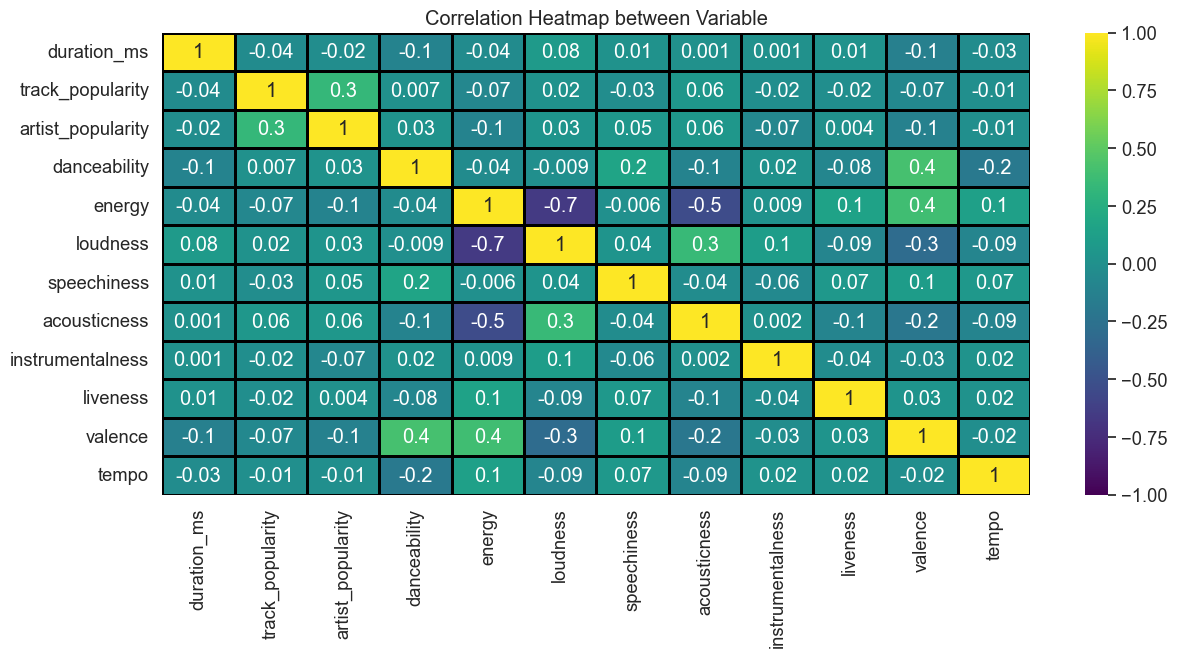

In [69]:
# Correlation Heatmap between Variable using Pearson correlation method
audio_features = data_clean[['duration_ms', 'track_popularity','artist_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
corr = audio_features.corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(corr, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='viridis', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

[Text(0.5, 0, 'duration_ms'),
 Text(1.5, 0, 'track_popularity'),
 Text(2.5, 0, 'artist_popularity'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo')]

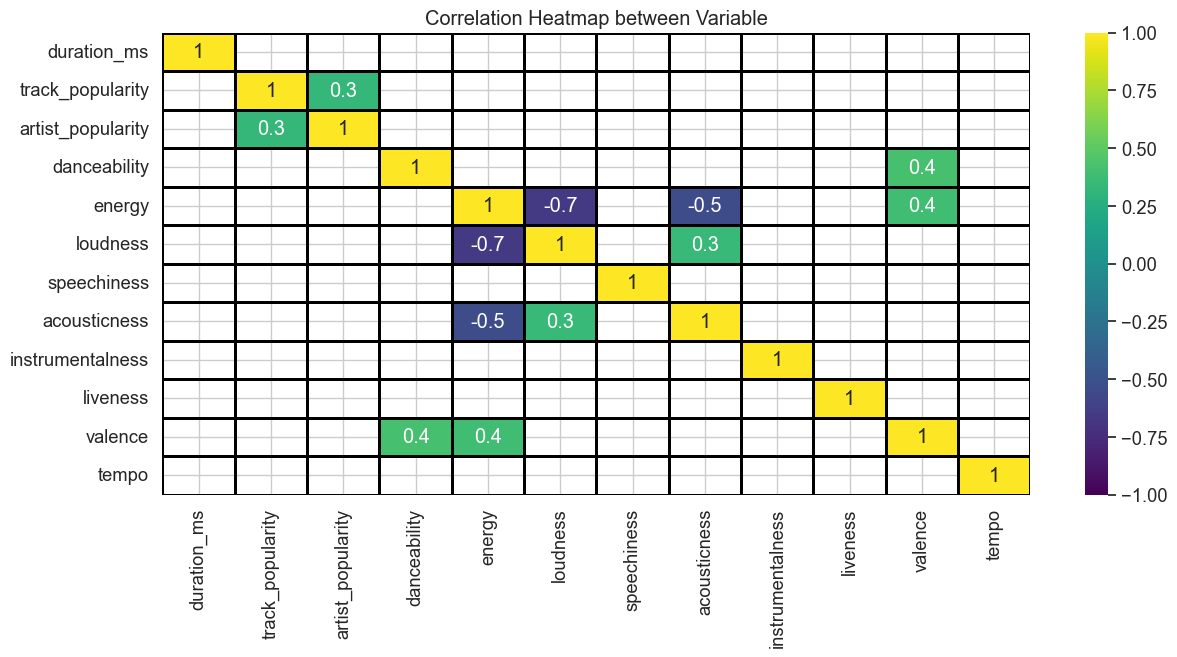

In [75]:
# Define the threshold values
threshold_low = -0.3
threshold_high = 0.3

mask = corr[(corr >= threshold_high) | (corr <= threshold_low)]
plt.figure(figsize=(14,6))
map = sns.heatmap(mask, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='viridis', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

### Analysis on the correlations with popularity

In [78]:
continuous_vars = data_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = continuous_vars.corr()
correlation_with_popularity = correlation_matrix['track_popularity'].drop('track_popularity')
correlation_with_popularity


year                 0.218524
artist_popularity    0.331029
danceability         0.006881
energy              -0.074284
loudness             0.021696
mode                 0.019854
speechiness         -0.027161
acousticness         0.058311
instrumentalness    -0.020854
liveness            -0.020033
valence             -0.067300
tempo               -0.013565
duration_ms         -0.043956
track_age_2024      -0.218524
Name: track_popularity, dtype: float64

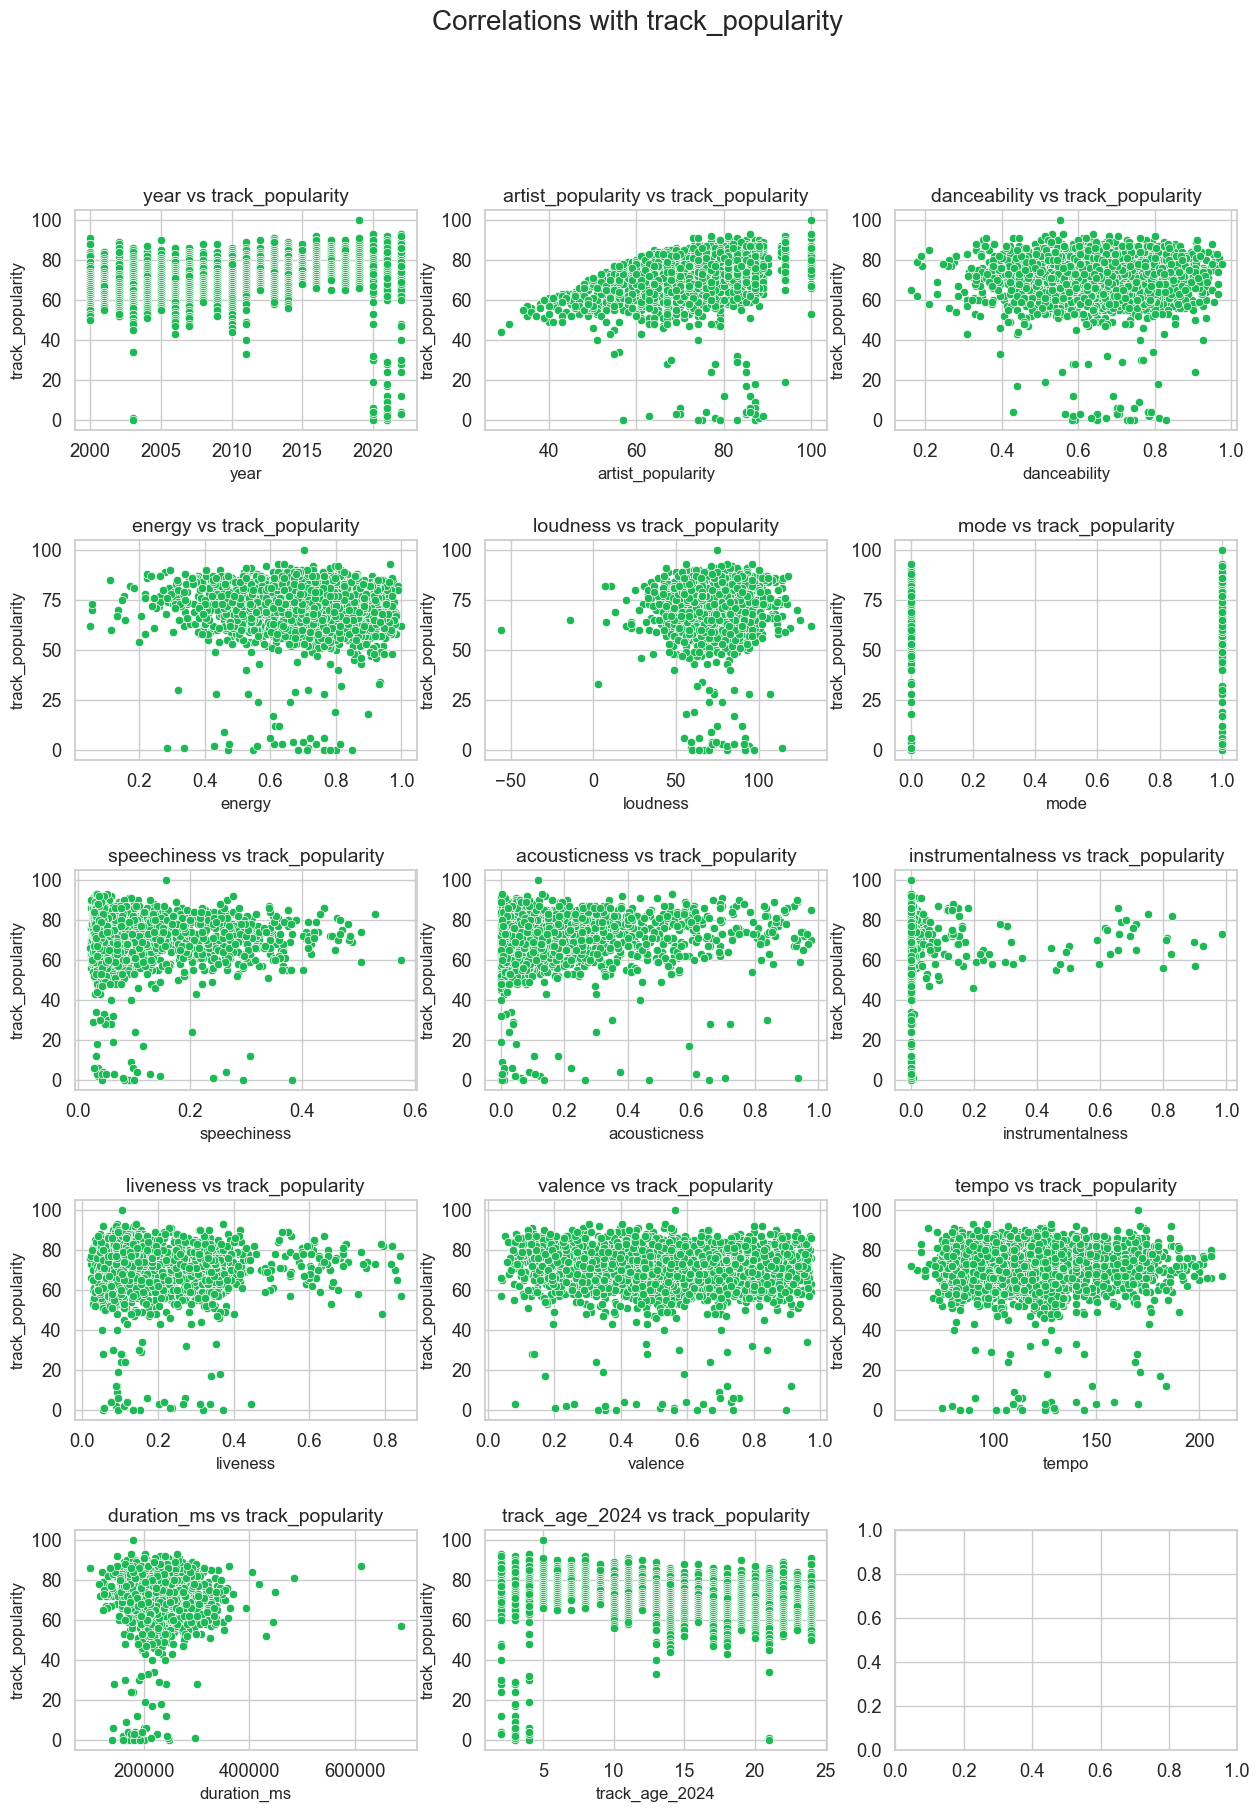

In [79]:

#plot the correlations with track_popularity in scatterplots (3 columns 5 rows)
# Select the continuous variables and calculate the correlation matrix
continuous_vars = data_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = continuous_vars.corr()

# Get the correlations with track_popularity
correlation_with_popularity = correlation_matrix['track_popularity'].drop('track_popularity')

# Create subplots with 3 columns and 5 rows
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Plot scatterplots for each variable with track_popularity
for ax, col in zip(axes.flatten(), correlation_with_popularity.index):
    sns.scatterplot(x=col, y='track_popularity', data=data_clean, ax=ax, color='#1db954')
    ax.set_title(f'{col} vs track_popularity', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('track_popularity', fontsize=12)

# Display the plot
plt.suptitle('Correlations with track_popularity', fontsize=20)
plt.show()




1. `year`: is wrong --> shouldn't be in analysis
2. `danceability`: Higher danceability tends to be associated with higher track popularity.
3. `energy`: Higher energy levels are generally associated with higher track popularity.
4. `loudness`: There is a positive correlation between loudness and track popularity.
5. `speechiness`: There doesn't seem to be a strong relationship between speechiness and track popularity.
6. `acousticness`: Lower acousticness levels tend to be associated with higher track popularity.
7. `instrumentalness`: There doesn't seem to be a clear relationship between instrumentalness and track popularity.
8. `liveness`: There doesn't seem to be a strong relationship between liveness and track popularity.
9. `valence`: Higher valence (positiveness) tends to be associated with higher track popularity.
10. `tempo`: There doesn't seem to be a clear relationship between tempo and track popularity.
11. `duration_ms`: There doesn't seem to be a strong relationship between duration and track popularity.
12. `artist_popularity`: Higher artist popularity is generally associated with higher track popularity.
